In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [22]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)

healthorg_df = pd.concat(df_ls, ignore_index = True)

# fix dates

dates = []
for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates

# filter for tweets in first half of 2020

healthorg_df = healthorg_df[healthorg_df["date"] <= datetime.date(2020,5,25)]
healthorg_df = healthorg_df[healthorg_df["date"] >= datetime.date(2020,3,1)]
healthorg_df = healthorg_df.drop_duplicates("tweet")

df_names = []
for line in healthorg_df["username"].unique():
    df_names.append(line)

# export to excel for easier access
healthorg_df.to_excel("Processed/healthorg.xlsx")


In [23]:
# Left News Outlets
df_path = glob.glob('./News_Outlets/Left/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

leftnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in leftnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

leftnews_df["date"] = dates

leftnews_df = leftnews_df[leftnews_df["date"] <= datetime.date(2020,5,25)]
leftnews_df = leftnews_df[leftnews_df["date"] >= datetime.date(2020,3,1)]

leftnews_df = leftnews_df.drop_duplicates("tweet")

for line in leftnews_df["username"].drop_duplicates():
    df_names.append(line)

leftnews_df.to_excel("Processed/leftnews.xlsx")

C:\Users\Jennifer Tramsu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
# Right News Outlets
df_path = glob.glob('./News_Outlets/Right/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

rightnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in rightnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

rightnews_df["date"] = dates

rightnews_df = rightnews_df[rightnews_df["date"] <= datetime.date(2020,5,25)]
rightnews_df = rightnews_df[rightnews_df["date"] >= datetime.date(2020,3,1)]

rightnews_df = rightnews_df.drop_duplicates("tweet")

for line in rightnews_df["username"].drop_duplicates():
    df_names.append(line)

rightnews_df.to_excel("Processed/rightnews.xlsx")

In [32]:
# Right Individuals
df_path = glob.glob('./Right/*.csv')
trump = pd.read_csv("./Right/trump_tweets.csv") #https://www.kaggle.com/codebreaker619/donald-trump-tweets-dataset
df_ls = []

for path in df_path:
    if "trump_tweets" in path:
        continue
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

# general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    df_ls.append(covid)

right_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in right_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

right_df["date"] = dates

right_df = right_df[right_df["date"] <= datetime.date(2020, 5,25)]
right_df = right_df[right_df["date"] >= datetime.date(2020,3,1)]
right_df = right_df.drop_duplicates("tweet")

for line in right_df["username"].drop_duplicates():
    df_names.append(line)

# rename dataset columns to match others
trump["tweet"] = trump["text"]
trump["retweets_count"] = trump["retweets"]
trump["likes_count"] = trump["favorites"]
trump["retweet"] = trump["isRetweet"]
trump = trump[["tweet", "date", "retweets_count", "likes_count", "retweet"]]

#filter dates
trump_dates = trump["date"]
trump_dates_corr = []
trump_dates_corr = [d[:10] for d in trump_dates]
trump_dates_corr = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in trump_dates_corr]
trump_dates_corr = [datetime.datetime.date(d) for d in trump_dates_corr]
trump["date"] = trump_dates_corr

trump = trump[trump["date"] >= datetime.date(2020, 3, 1)]
trump = trump[trump["date"] <= datetime.date(2020, 5,25)]

trump = trump[trump['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

right_df = pd.concat([right_df, trump])

for line in right_df["username"].drop_duplicates().dropna():
    df_names.append(line)

right_df.to_excel("Processed/rightind.xlsx")

In [31]:
# Left Individuals

df_path = glob.glob('./Left/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

# general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)


left_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in left_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

left_df["date"] = dates
left_df = left_df[left_df["date"] <= datetime.date(2020, 5,25)]
left_df = left_df[left_df["date"] >= datetime.date(2020, 3, 1)]
left_df = left_df.drop_duplicates("tweet")

for line in left_df["username"].drop_duplicates():
    df_names.append(line)

left_df.to_excel("Processed/leftind.xlsx")

In [33]:
# Celebrities

df_path = glob.glob('./Celebrities/*.csv')
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

celeb_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in celeb_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

celeb_df["date"] = dates
celeb_df = celeb_df[celeb_df["date"] <= datetime.date(2020, 5,25)]
celeb_df = celeb_df[celeb_df["date"] >= datetime.date(2020, 3, 1)]
celeb_df = celeb_df.drop_duplicates("tweet")

for line in celeb_df["username"].drop_duplicates():
    df_names.append(line)

celeb_df.to_excel("Processed/celebrities.xlsx")

In [35]:
# filtering CMUID

df_cmulabels = pd.read_csv("./fake news/CMU_MisCov19_dataset.csv")[["status_id", "annotation1"]]

df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("irrelevant") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("news") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("politics") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("sarcasm") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("commercial") == False]

df1 = df_cmulabels[df_cmulabels["annotation1"].str.contains("false") == True]
df2 = df_cmulabels[df_cmulabels["annotation1"].str.contains("fake") == True]
df3 = df_cmulabels[df_cmulabels["annotation1"].str.contains("conspiracy") == True]
df4 = df_cmulabels[df_cmulabels["annotation1"].str.contains("panic") == True]

cmu_fake = pd.concat([df1, df2, df3, df4])

df5 = df_cmulabels[df_cmulabels["annotation1"].str.contains("true") == True]
df6 = df_cmulabels[df_cmulabels["annotation1"].str.contains("emergency") == True]
df7 = df_cmulabels[df_cmulabels["annotation1"].str.contains("correction") == True]

cmu_real = pd.concat([df5, df6, df7])


In [37]:
# filtering FakeNews

df_fakenews = pd.read_csv("./Covid19_FakeNews_Detection-master/data/Language_CSVs/english.csv", index_col=0)

df_fakenews_f = df_fakenews[df_fakenews["label"] == 0]
df_fakenews_r = df_fakenews[df_fakenews["label"] == 1]

In [39]:
# fake news

CMU_fake = pd.read_csv("./fake news/cmu_fake_hydrated.csv", index_col=0)
detection_fake = pd.read_csv("./Covid19_FakeNews_Detection-master/detection_fake.csv")
#covidFake = pd.read_csv("./fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./fake news/Misinformation_hydrated.csv", index_col=0)
fakeTweets = pd.read_csv("./Cross-SEAN Dataset/Fake_Tweets.csv", index_col=0)

fake = [CMU_fake, detection_fake, misinformation, fakeTweets]

dfs = pd.concat(fake)

dfs = dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

fake_dfs = dfs

# fake_dfs = pd.concat([fake_dfs, dfs])

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

fake_dfs = fake_dfs[fake_dfs["date"] >= datetime.date(2020, 3, 1)]
fake_dfs = fake_dfs[fake_dfs["date"] <= datetime.date(2020,5,25)]
fake_dfs = fake_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    fake_dfs = fake_dfs[fake_dfs["user_screen_name"].str.lower().str.contains(name) == False]

fake_dfs.to_excel("Processed/fake.xlsx")


In [40]:
# real tweets

CMU_real = pd.read_csv("./fake news/cmu_real_hydrated.csv", index_col=0)
realTweets = pd.read_csv("./Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
detection_real = pd.read_csv("./Covid19_FakeNews_Detection-master/detection_real.csv")

real_dfs = pd.concat([realTweets, CMU_real, detection_real])

real_dfs = real_dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date
dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()   

# reassigned back to df
real_dfs["date"] = dates
real_dfs = real_dfs[real_dfs["date"] >= datetime.date(2020, 3, 1)]
real_dfs = real_dfs[real_dfs["date"] <= datetime.date(2020,5,25)]
real_dfs = real_dfs.drop("created_at", axis=1)
real_dfs = real_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    real_dfs = real_dfs[real_dfs["user_screen_name"].str.lower().str.contains(name) == False]

real_dfs.to_excel("Processed/real.xlsx")


Text(0.5, 1.0, 'Real Tweets')

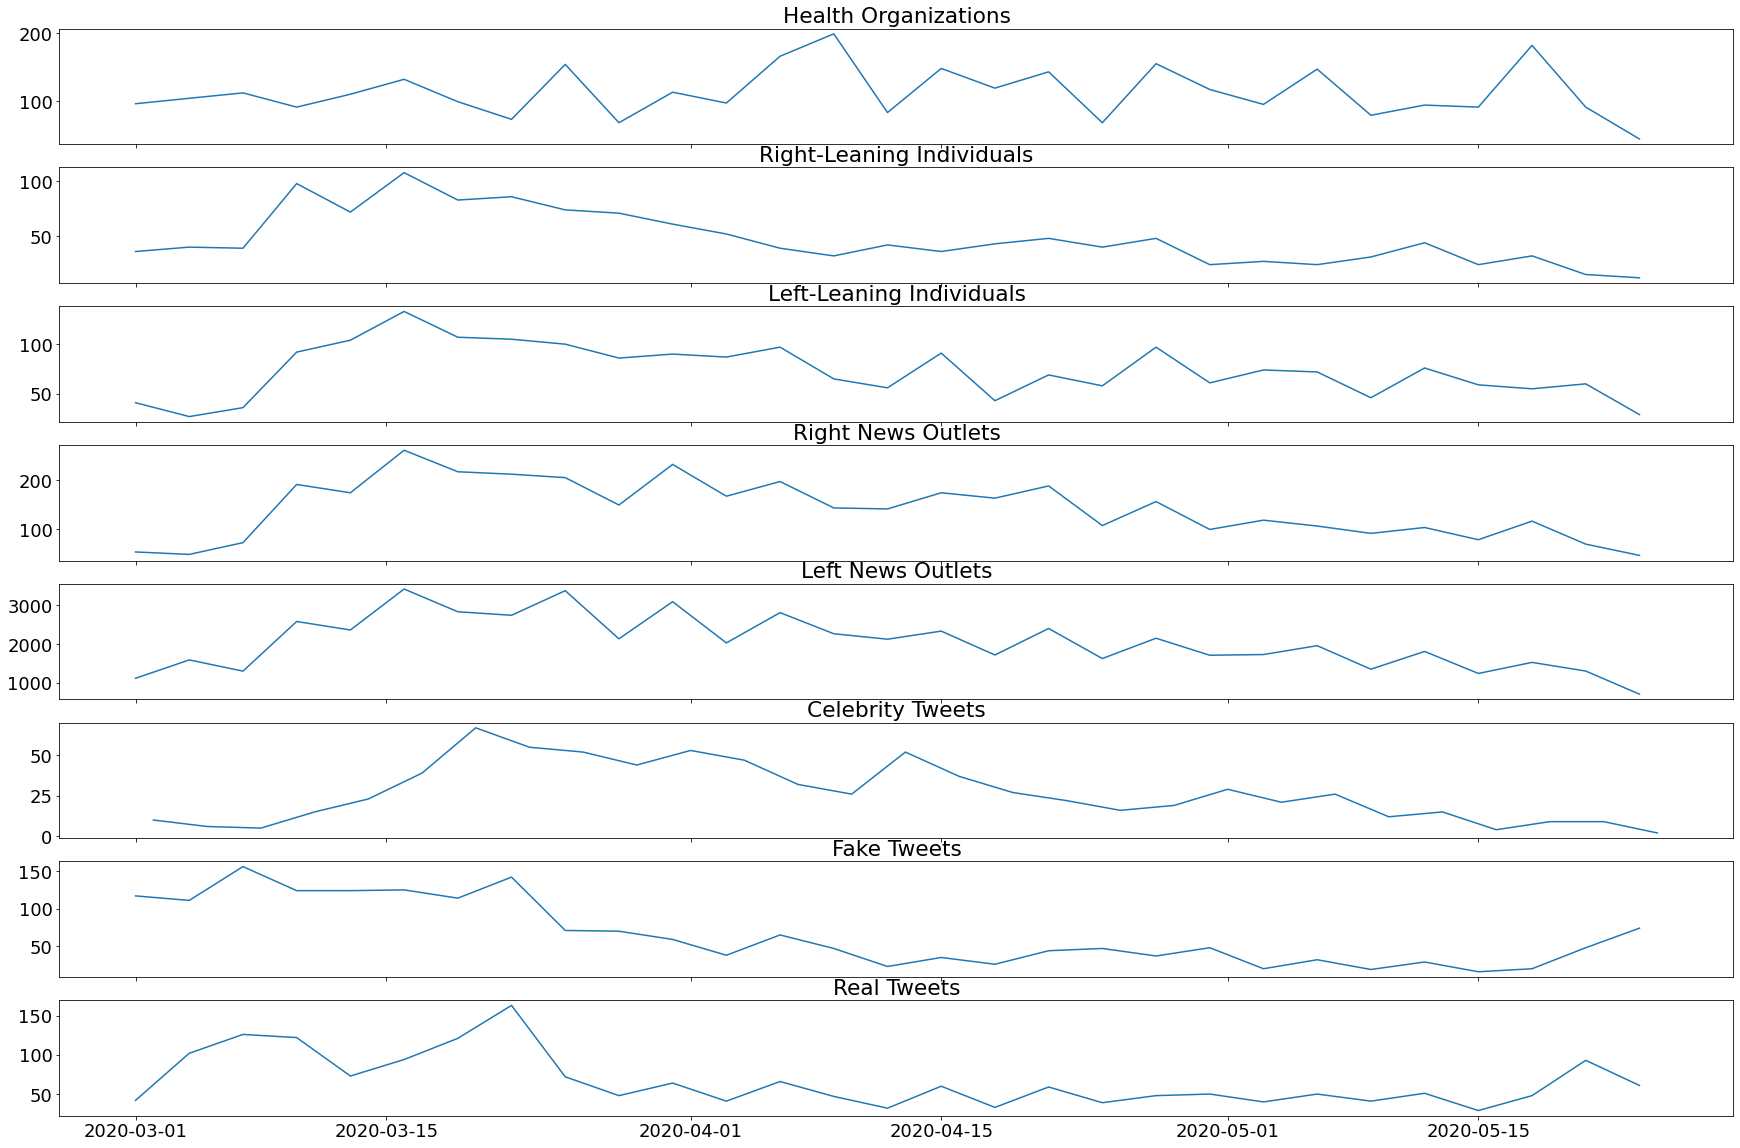

In [41]:
# 3-Day Bins

healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
right_df["date"] = pd.to_datetime(right_df["date"])
left_df["date"] = pd.to_datetime(left_df["date"])
rightnews_df["date"] = pd.to_datetime(rightnews_df["date"])
leftnews_df["date"] = pd.to_datetime(leftnews_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_dfs["date"] = pd.to_datetime(real_dfs["date"])
fake_dfs["date"] = pd.to_datetime(fake_dfs["date"])

health_bins = pd.Series(index=healthorg_df.date, data=np.array(healthorg_df.count)).resample('3D').count()
right_bins = pd.Series(index=right_df.date, data=np.array(right_df.count)).resample('3D').count()
left_bins = pd.Series(index=left_df.date, data=np.array(left_df.count)).resample('3D').count()
rightnews_bins = pd.Series(index=rightnews_df.date, data=np.array(rightnews_df.count)).resample('3D').count()
leftnews_bins = pd.Series(index=leftnews_df.date, data=np.array(leftnews_df.count)).resample('3D').count()
celeb_bins = pd.Series(index=celeb_df.date, data=np.array(celeb_df.count)).resample('3D').count()
real_bins = pd.Series(index=real_dfs.date, data=np.array(real_dfs.count)).resample('3D').count()
fake_bins = pd.Series(index=fake_dfs.date, data=np.array(fake_dfs.count)).resample('3D').count()

fig, axes = plt.subplots(8, 1, figsize=[30, 20], sharex=True)

axes[0].plot(health_bins)
axes[0].set_title("Health Organizations")

axes[1].plot(right_bins)
axes[1].set_title("Right-Leaning Individuals")

axes[2].plot(left_bins)
axes[2].set_title("Left-Leaning Individuals")

axes[3].plot(rightnews_bins)
axes[3].set_title("Right News Outlets")

axes[4].plot(leftnews_bins)
axes[4].set_title("Left News Outlets")

axes[5].plot(celeb_bins)
axes[5].set_title("Celebrity Tweets")

axes[6].plot(fake_bins)
axes[6].set_title("Fake Tweets")

axes[7].plot(real_bins)
axes[7].set_title("Real Tweets")


In [43]:
healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
right_dates = right_df.sort_values("date", ascending=True)["date"].value_counts()
left_dates = left_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

Text(0.5, 1.0, 'Real Tweets')

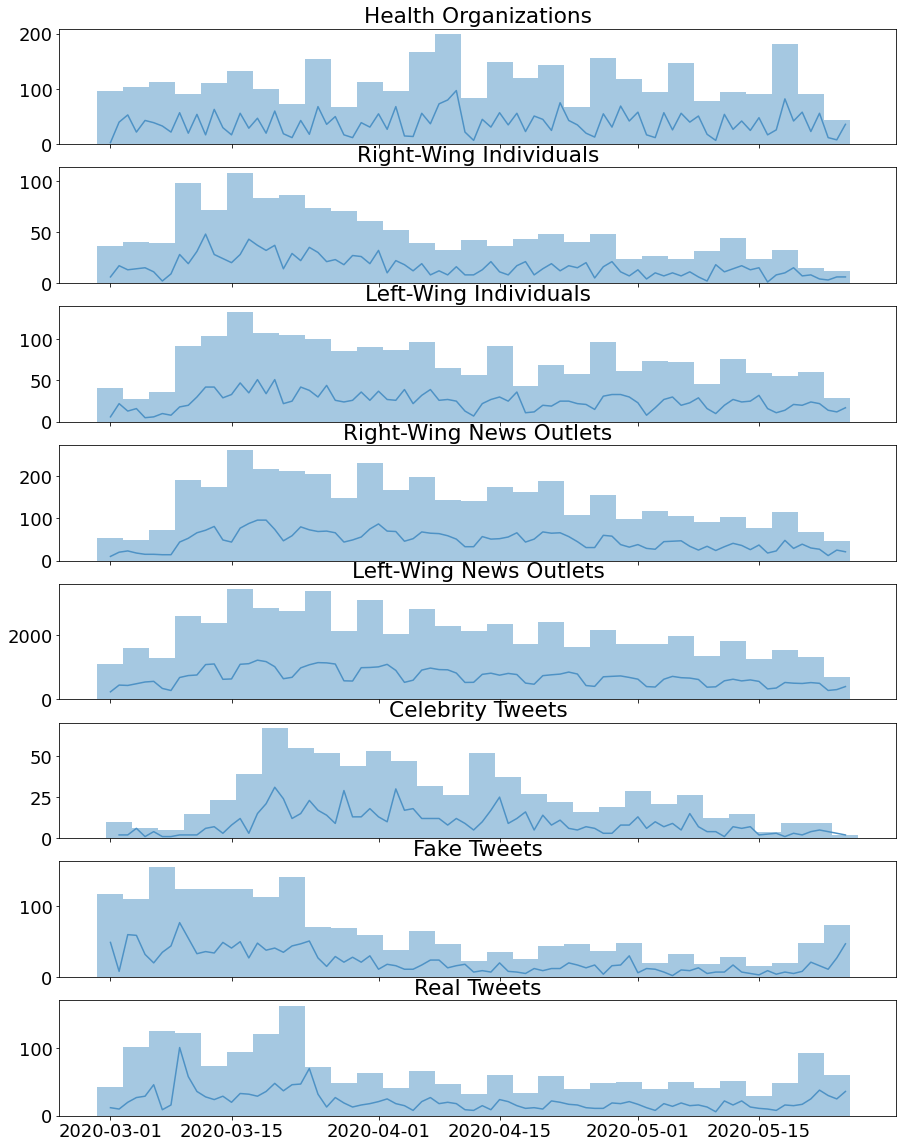

In [44]:
plt.rcParams.update({'font.size': 18})

fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)

axes[0].plot(healthorg_dates.sort_index(), color = '#4E92C5')
axes[0].bar(health_bins.index.sort_values(), health_bins, width=3, color = '#A5C8E1')
axes[0].set_title("Health Organizations")

axes[3].plot(rightnews_dates.sort_index(), color = '#4E92C5')
axes[3].bar(rightnews_bins.index.sort_values(), rightnews_bins, width=3, color = '#A5C8E1')
axes[3].set_title("Right-Wing News Outlets")

axes[4].plot(leftnews_dates.sort_index(), color = '#4E92C5')
axes[4].bar(leftnews_bins.index.sort_values(), leftnews_bins, width=3, color = '#A5C8E1')
axes[4].set_title("Left-Wing News Outlets")

axes[1].plot(right_dates.sort_index(), color = '#4E92C5')
axes[1].bar(right_bins.index.sort_values(), right_bins, width=3, color = '#A5C8E1')
axes[1].set_title("Right-Wing Individuals")

axes[2].plot(left_dates.sort_index(), color = '#4E92C5')
axes[2].bar(left_bins.index.sort_values(), left_bins, width=3, color = '#A5C8E1')
axes[2].set_title("Left-Wing Individuals")

axes[5].plot(celeb_dates.sort_index(), color = '#4E92C5')
axes[5].bar(celeb_bins.index.sort_values(), celeb_bins, width=3, color = '#A5C8E1')
axes[5].set_title("Celebrity Tweets")

axes[6].plot(fake_tweets.sort_index(), color = '#4E92C5')
axes[6].bar(fake_bins.index.sort_values(), fake_bins, width=3, color = '#A5C8E1')
axes[6].set_title("Fake Tweets")

axes[7].plot(real_tweets.sort_index(), color = '#4E92C5')
axes[7].bar(real_bins.index.sort_values(), real_bins, width=3, color = '#A5C8E1')
axes[7].set_title("Real Tweets")

Text(0.5, 1.0, 'Celebrity Tweets')

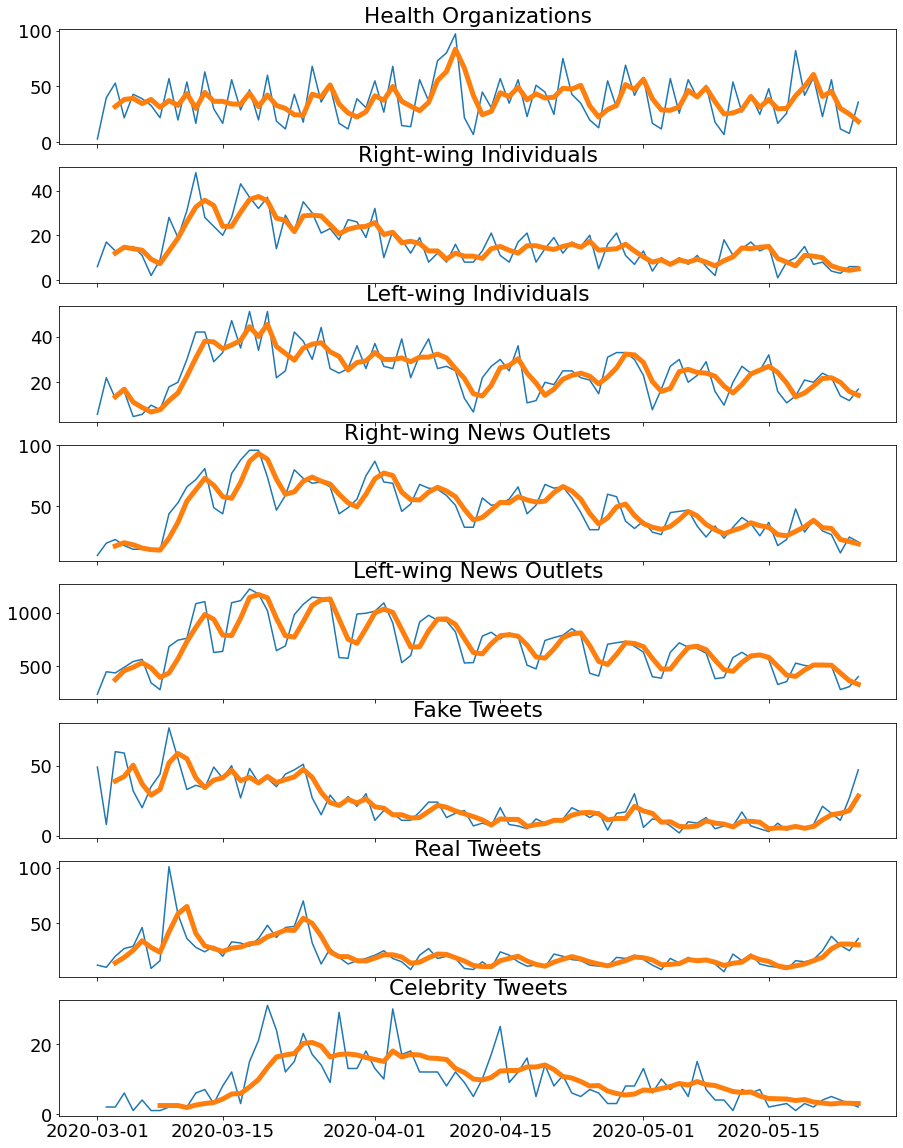

In [45]:
# 1-Day Bin
plt.rcParams.update({'font.size': 18})
healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
right_dates = right_df.sort_values("date", ascending=True)["date"].value_counts()
left_dates = left_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)

axes[0].plot(healthorg_dates.sort_index())
axes[0].plot(healthorg_dates.sort_index().rolling(window=3).mean(), linewidth=5)
axes[0].set_title("Health Organizations")

axes[1].plot(right_dates.sort_index())
axes[1].plot(right_dates.sort_index().rolling(window=3).mean(), linewidth=5)
axes[1].set_title("Right-wing Individuals")

axes[2].plot(left_dates.sort_index())
axes[2].plot(left_dates.sort_index().rolling(window=3).mean(), linewidth=5)
axes[2].set_title("Left-wing Individuals")

axes[3].plot(rightnews_dates.sort_index())
axes[3].plot(rightnews_dates.sort_index().rolling(window=3).mean(), linewidth=5)
axes[3].set_title("Right-wing News Outlets")

axes[4].plot(leftnews_dates.sort_index())
axes[4].plot(leftnews_dates.sort_index().rolling(window=3).mean(), linewidth=5)
axes[4].set_title("Left-wing News Outlets")

axes[5].plot(fake_tweets.sort_index())
axes[5].plot(fake_tweets.sort_index().rolling(window=3).mean(), linewidth=5)
axes[5].set_title("Fake Tweets")

axes[6].plot(real_tweets.sort_index())
axes[6].plot(real_tweets.sort_index().rolling(window=3).mean(), linewidth=5)
axes[6].set_title("Real Tweets")

axes[7].plot(celeb_dates.sort_index())
axes[7].plot(celeb_dates.sort_index().rolling(window=7).mean(), linewidth=5)
axes[7].set_title("Celebrity Tweets")


In [46]:
# get total followers
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()

file = pd.read_csv("right_followers", usecols=[0, 1])
right_followers = file["followers"].sum()

file = pd.read_csv("left_followers", usecols=[0, 1])
left_followers = file["followers"].sum()

file = pd.read_csv("rightnews_followers", usecols=[0, 1])
rightnews_followers = file["followers"].sum()

file = pd.read_csv("leftnews_followers", usecols=[0, 1])
leftnews_followers = file["followers"].sum()

file = pd.read_csv("celebrity_followers", usecols=[0, 1])
celeb_followers = file["followers"].sum()

fake_followers = fake_dfs["user_followers_count"].drop_duplicates().sum()

real_followers = real_dfs["user_followers_count"].drop_duplicates().sum()

In [47]:
# tweet count

health_count = healthorg_df["tweet"].count()
right_count = right_df["tweet"].count()
left_count = left_df["tweet"].count()
rightnews_count = rightnews_df["tweet"].count()
leftnews_count = leftnews_df["tweet"].count()
celeb_count = celeb_df["tweet"].count()

fake_count = fake_dfs["text"].count()
real_count = real_dfs["text"].count()

print("HealthOrg Tweets: \t{}\nPolitically-Right Leaning Tweets: \t{}\nPolitically-Left Leaning Tweets:\t{}\nRight News Outlet Tweets: \t{}\nLeft News Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\nCelebrity Tweets:\t{}\n".format(health_count, right_count, left_count, rightnews_count, leftnews_count, fake_count, real_count, celeb_count))

HealthOrg Tweets: 	3270
Politically-Right Leaning Tweets: 	1381
Politically-Left Leaning Tweets:	2116
Right News Outlet Tweets: 	4076
Left News Outlet Tweets: 	59427
Fake Tweets:		1881
Real Tweets:		1915
Celebrity Tweets:	774



In [48]:
# followers count

print("HealthOrg Followers: \t{}\nRight Followers: \t{}\nLeft Followers:\t\t{}\nRight News Outlet Followers: \t{}\nLeft News Outlet Followers: \t{}\nFake Followers:\t\t{}\nReal Followers:\t\t{}\nCelebrity Followers:\t{}\n".format(healthorg_followers, right_followers, left_followers, rightnews_followers, leftnews_followers, fake_followers, real_followers, celeb_followers))

HealthOrg Followers: 	16186103
Right Followers: 	56227294
Left Followers:		285323343
Right News Outlet Followers: 	30054143
Left News Outlet Followers: 	273701452
Fake Followers:		686299300
Real Followers:		201731355
Celebrity Followers:	2842299929

